**ŽAIDIMO "LEAGUE OF LEGENDS" DUOMENŲ ANALIZĖ**

*League of legends yra MOBA(multiplayer online battle arena) tipo žaidimas, žaidžiamas 10 žaidėju realiu laiku.
Žaidėjai pasiskirsto į komandas po 5. Kiekvienas žaidėjas pasirenka vieną iš 156 esamų personažų ir jį valdo vieno žaidimo metu. <br>
Kiekvienas personažas turi specialią galią ir dalyvauja vienoje iš 5 rolių.(ADC,SUPPORT,MID,TOP,JUNGLE)<br>
Žaidimą laimi komanda pirma sugriovusi kitos komandos 'Inhibitor' bokštą (bazę), bet iki to seka trys 'Towers'(bokšteliai) kiekvienos linijos (yra 3) kuriuos reikia nugriauti. <br>
Kiekviena komanda gauna specialių galių arba papildomai pinigų nukovojusius 'Dragon', 'Baron', 'Rift Herald' ir kt pabaisas.
Taip pat gavę 'first blood' arba nuvertę 'first tower'*




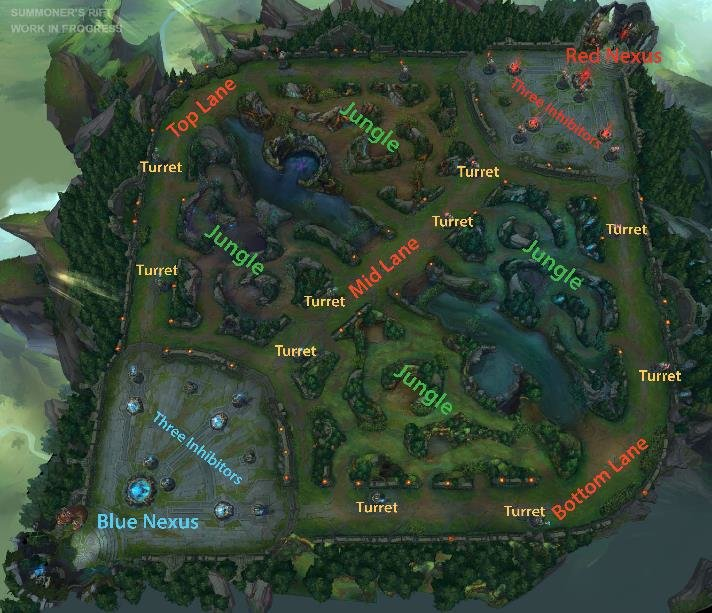

**ANALIZĖS APRAŠYMAS**

Mano analizę sudarys 3 dalys: <br>
1. "Diamond" lygos žaidėjų elgiasys, išvados <br>
2. "League of legends championship 2021", išvados <br>
3. "Diamond" lygos ir  "League of legends championship 2021" žaidimų palyginimas.

# PIRMA DALIS: "Diamond" lygos žaidėjų elgiasys

**Duomenų sukėlimas** *("Diamond" lyga)*

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib
import matplotlib.pyplot as plt

In [4]:
champ_info=pd.read_json('C:\\Users\\migle\\Desktop\\baigiamasis\\champs and bans\\champion_info.json')
champ_info= pd.read_json((champ_info['data']).to_json(),orient='index')
champ_info

,title,id,key,name
1,the Dark Child,1,Annie,Annie
10,The Judicator,10,Kayle,Kayle
101,the Magus Ascendant,101,Xerath,Xerath
102,the Half-Dragon,102,Shyvana,Shyvana
103,the Nine-Tailed Fox,103,Ahri,Ahri
...,...,...,...,...
91,the Blade's Shadow,91,Talon,Talon
92,the Exile,92,Riven,Riven
96,the Mouth of the Abyss,96,KogMaw,Kog'Maw
98,the Eye of Twilight,98,Shen,Shen


In [5]:
champ_info2=pd.read_json('C:\\Users\\migle\\Desktop\\baigiamasis\\champs and bans\\champion_info_2.json')
champ_info2 = pd.read_json((champ_info2['data']).to_json(),orient='index')
champ_info2

,tags,title,id,key,name
Aatrox,"[Fighter, Tank]",the Darkin Blade,266,Aatrox,Aatrox
Ahri,"[Mage, Assassin]",the Nine-Tailed Fox,103,Ahri,Ahri
Akali,[Assassin],the Fist of Shadow,84,Akali,Akali
Alistar,"[Tank, Support]",the Minotaur,12,Alistar,Alistar
Amumu,"[Tank, Mage]",the Sad Mummy,32,Amumu,Amumu
...,...,...,...,...,...
Zac,"[Tank, Fighter]",the Secret Weapon,154,Zac,Zac
Zed,"[Assassin, Fighter]",the Master of Shadows,238,Zed,Zed
Ziggs,[Mage],the Hexplosives Expert,115,Ziggs,Ziggs
Zilean,"[Support, Mage]",the Chronokeeper,26,Zilean,Zilean


In [6]:
summoner_spell=pd.read_json('C:\\Users\\migle\\Desktop\\baigiamasis\\champs and bans\\summoner_spell_info.json')
summoner_spell= pd.read_json((summoner_spell['data']).to_json(),orient='index')
summoner_spell

,id,summonerLevel,name,key,description
1,1,6,Cleanse,SummonerBoost,Removes all disables (excluding suppression an...
11,11,10,Smite,SummonerSmite,Deals 390-1000 true damage (depending on champ...
12,12,6,Teleport,SummonerTeleport,"After channeling for 4.5 seconds, teleports yo..."
13,13,1,Clarity,SummonerMana,Restores 50% of your champion's maximum Mana. ...
14,14,10,Ignite,SummonerDot,"Ignites target enemy champion, dealing 70-410 ..."
21,21,4,Barrier,SummonerBarrier,Shields your champion from 115-455 damage (dep...
3,3,4,Exhaust,SummonerExhaust,"Exhausts target enemy champion, reducing their..."
30,30,1,To the King!,SummonerPoroRecall,Quickly travel to the Poro King's side.
31,31,1,Poro Toss,SummonerPoroThrow,"Toss a Poro at your enemies. If it hits, you c..."
32,32,1,Mark,SummonerSnowball,Throw a snowball in a straight line at your en...


In [7]:
ranked_games=pd.read_csv('C:\\Users\\migle\\Desktop\\baigiamasis\\champs and bans\\games.csv')
ranked_games

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


## Vieno žaidimo trukmė 

In [13]:
a1 = ranked_games['gameDuration'].min()
b1 = ranked_games['gameDuration'].max()
c1 = ranked_games['gameDuration'].mean()
print(a1)
print(b1)
print(c1)

190
4728
1832.3628083122937


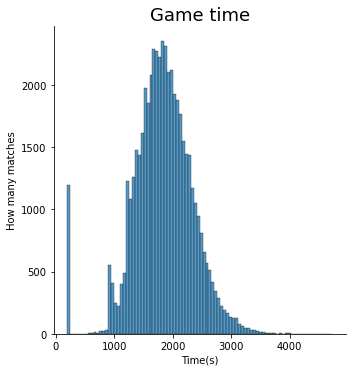

In [115]:
fig_1 = sns.displot(ranked_games['gameDuration'], bins=90)
plt.xlabel('Time(s)')
plt.ylabel('How many matches')
plt.title('Game time', fontsize = 18)
plt.show(fig_1)

Minimalios reikšmės pvz 190s nusako jog žaidime galejo būti trukdžių, ne visi žaidėjai galėjo prisijungti, iš kart nubalsuotas pasidavimas, bug'as išsijungė žaidimas. <br>
Maksimalios reikšmės pvz 4728s, nusako įtemptą žaidimą, lygias komandų jėgas, panašias strategijas, counter pick'us.<br>
Pagal grafiką galim įžvelgti jog dažniausiai pasitaikantis laiko tarpas per kurį vyksta vienas žaidimas, atitinka vidutinę (mean) žaidimo trukmę. 


## Ar 'Pirmieji' veiksmai turi įtakos laimėjimui 

In [18]:
komandu_pav_pakeitimas = ranked_games.replace([0,1,2],['Nei viena','Blue','Red'])
komandu_pav_pakeitimas

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,Blue,Red,Blue,Blue,Blue,Blue,...,5,Nei viena,Nei viena,Blue,Blue,114,67,43,16,51
1,3229566029,1497848803862,1851,9,Blue,Blue,Blue,Blue,Nei viena,Blue,...,Red,Nei viena,Nei viena,Nei viena,Nei viena,11,67,238,51,420
2,3327363504,1504360103310,1493,9,Blue,Red,Blue,Blue,Blue,Red,...,Red,Nei viena,Nei viena,Blue,Nei viena,157,238,121,57,28
3,3326856598,1504348503996,1758,9,Blue,Blue,Blue,Blue,Blue,Blue,...,Nei viena,Nei viena,Nei viena,Nei viena,Nei viena,164,18,141,40,51
4,3330080762,1504554410899,2094,9,Blue,Red,Blue,Blue,Blue,Blue,...,3,Nei viena,Nei viena,Blue,Nei viena,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,Red,Blue,Red,Red,Nei viena,Red,...,10,Red,Nei viena,4,Nei viena,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,Red,Blue,Blue,Red,Red,Red,...,11,7,4,4,Blue,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,Red,Red,Red,Red,Nei viena,Blue,...,10,Red,Nei viena,Red,Nei viena,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,Red,Red,Red,Red,Nei viena,Red,...,11,3,Nei viena,Blue,Nei viena,154,39,51,90,114


Kiek iš viso kartų komandai pavyko, paimti firstBlood, firstTower, firstInhibitor, firstBaron, firstDragon, firstRiftHerald:


In [72]:
Pirmieji_veiksmai = ['firstBlood','firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald']
Pirmieji_veiksmai_viso = komandu_pav_pakeitimas[Pirmieji_veiksmai].apply(pd.value_counts)
Nauji_pav = ['Nei viena','Blue','Red']
Pirmieji_veiksmai_viso 

,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald
Blue,26113,25861,23054,14758,24690,12948
Nei viena,555,1213,6276,20258,2000,26179
Red,24822,24416,22160,16474,24800,12363


Detalus kiekvienas matmuo ir jo grafikas:

In [116]:
ranked_games['firstBlood'].value_counts()

1    26113
2    24822
0      555
Name: firstBlood, dtype: int64

Text(0.5, 1.0, 'First blood chart')

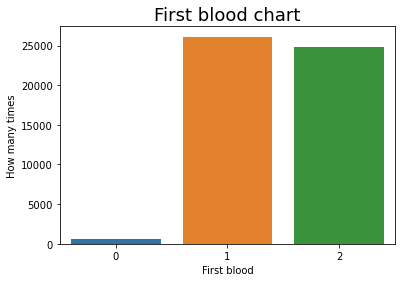

In [188]:
sns.countplot(x = 'firstBlood', data = ranked_games)
plt.xlabel('First blood')
plt.ylabel('How many times')
plt.title('First blood chart', fontsize = 18)

Mėlyna (Blue) komanda daugiau kartų pasiimė 'first blood', skirtumas nežymus.

In [118]:
ranked_games['firstTower'].value_counts()

1    25861
2    24416
0     1213
Name: firstTower, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

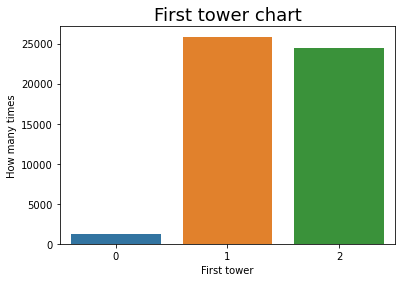

In [119]:
sns.countplot(x = 'firstTower', data = ranked_games)
plt.xlabel('First tower')
plt.ylabel('How many times')
plt.title('First tower chart', fontsize = 18)
plt.show

Mėlyna (Blue) komanda daugiau kartų pasiimė 'first tower', skirtumas nežymus.

In [120]:
ranked_games['firstInhibitor'].value_counts()

1    23054
2    22160
0     6276
Name: firstInhibitor, dtype: int64

Text(0.5, 1.0, 'First inhibitor chart')

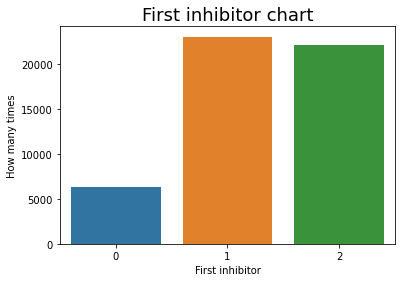

In [121]:
sns.countplot(x = 'firstInhibitor', data = ranked_games)
plt.xlabel('First inhibitor')
plt.ylabel('How many times')
plt.title('First inhibitor chart', fontsize = 18)

Mėlyna (Blue) komanda daugiau kartų žaidimuose 'best of 3', nuvertė 'inhibitor' bokštą, skirtumas nežymus.

In [122]:
ranked_games['firstBaron'].value_counts()

0    20258
2    16474
1    14758
Name: firstBaron, dtype: int64

Text(0.5, 1.0, 'First Baron chart')

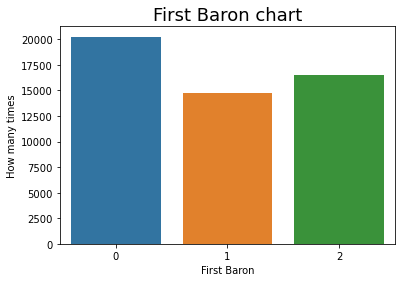

In [123]:
sns.countplot(x = 'firstBaron', data = ranked_games)
plt.xlabel('First Baron')
plt.ylabel('How many times')
plt.title('First Baron chart', fontsize = 18)

Mėlyna (Blue) komanda daugiau kartų pasiimė 'first baron', nors ir skirtumas nėra didelis,
stebina jog abi komandos daugiausia kartų nepasinaudojo 'boost' kurį duoda 'baron' pabaisa. 

In [124]:
ranked_games['firstDragon'].value_counts()

2    24800
1    24690
0     2000
Name: firstDragon, dtype: int64

Text(0.5, 1.0, 'First Dragon chart')

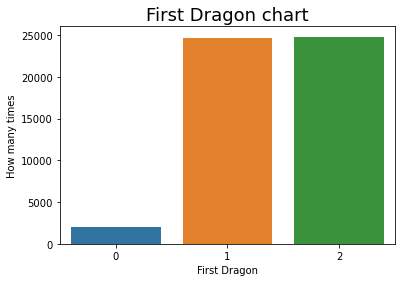

In [125]:
sns.countplot(x = 'firstDragon', data = ranked_games)
plt.xlabel('First Dragon')
plt.ylabel('How many times')
plt.title('First Dragon chart', fontsize = 18)

Galima teigti jog 'First dragon' komandos pasidalijo pusiau, skirtumas visiškai nedaro įtakos. 

In [126]:
ranked_games['firstRiftHerald'].value_counts()

0    26179
1    12948
2    12363
Name: firstRiftHerald, dtype: int64

Text(0.5, 1.0, 'First Rift Herald chart')

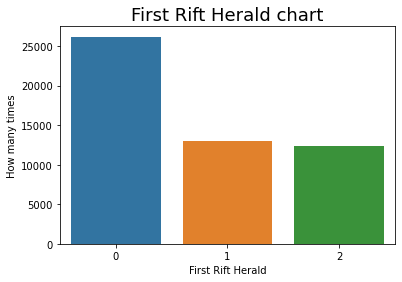

In [127]:
sns.countplot(x = 'firstRiftHerald', data = ranked_games)
plt.xlabel('First Rift Herald')
plt.ylabel('How many times')
plt.title('First Rift Herald chart', fontsize = 18)

Mėlyna (Blue) komanda daugiau kartų pasiimė 'First Rift Herald', taip pat kaip ir su 'Baron' situacija, stebina tai jog daugiau kartų ši pabaisa liko nepaliesta.

In [128]:
ranked_games['winner'].value_counts()

1    26077
2    25413
Name: winner, dtype: int64

Text(0.5, 1.0, 'Which team wins most of the games')

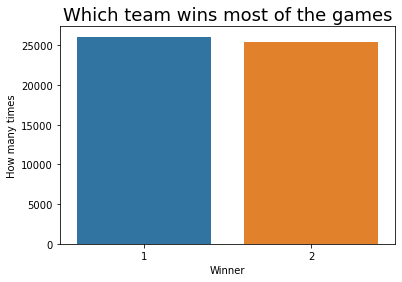

In [129]:
sns.countplot(x = 'winner', data = ranked_games)
plt.xlabel('Winner')
plt.ylabel('How many times')
plt.title('Which team wins most of the games', fontsize = 18)

Taip pat nežymiai daugiau kartų laimėjo mėlyną (Blue) komanda.<br>
Galima teigti jog komandai įtakos turėjo jos įsiveržimas 'First blood', 'First turrent', 'First inhibitor' kategorijoje.<br>
'First dragon' kategorija neturėjo įtakos.<br>
Raudonajai (Red) komandai laimėti padėtų 'First Baron' ir 'First Rift Herald', kurie sustiprintų komandą mėlynos (blue) komandos atžvilgiu ir padėtų įgauti pranašumą. 


## Kokius personažų (champions) pasirinkimus darė abi komandos?

In [54]:
ranked_games.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [60]:
champions_picked = ['t1_champ1id', 't1_champ2id', 't1_champ3id', 't1_champ4id', 't1_champ5id',
                    't2_champ1id', 't2_champ2id', 't2_champ3id', 't2_champ4id', 't2_champ5id']
champions_picked

['t1_champ1id',
 't1_champ2id',
 't1_champ3id',
 't1_champ4id',
 't1_champ5id',
 't2_champ1id',
 't2_champ2id',
 't2_champ3id',
 't2_champ4id',
 't2_champ5id']

In [61]:
Champions_banned = ['t1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5',
                    't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4', 't2_ban5']
Champions_banned

['t1_ban1',
 't1_ban2',
 't1_ban3',
 't1_ban4',
 't1_ban5',
 't2_ban1',
 't2_ban2',
 't2_ban3',
 't2_ban4',
 't2_ban5']

In [62]:
champions = champ_info2[['id', 'name']]
champ_dictionary = dict(zip(champions['id'], champions['name']))
for champion in champions_picked:
    pick = ranked_games[champion].replace(champ_dictionary, inplace=True)
for champion_bans in Champions_banned:
    ban = ranked_games[champion_bans].replace(champ_dictionary, inplace=True) 
champ_dictionary

{266: 'Aatrox',
 103: 'Ahri',
 84: 'Akali',
 12: 'Alistar',
 32: 'Amumu',
 34: 'Anivia',
 1: 'Annie',
 22: 'Ashe',
 136: 'Aurelion Sol',
 268: 'Azir',
 432: 'Bard',
 53: 'Blitzcrank',
 63: 'Brand',
 201: 'Braum',
 51: 'Caitlyn',
 164: 'Camille',
 69: 'Cassiopeia',
 31: "Cho'Gath",
 42: 'Corki',
 122: 'Darius',
 131: 'Diana',
 36: 'Dr. Mundo',
 119: 'Draven',
 245: 'Ekko',
 60: 'Elise',
 28: 'Evelynn',
 81: 'Ezreal',
 9: 'Fiddlesticks',
 114: 'Fiora',
 105: 'Fizz',
 3: 'Galio',
 41: 'Gangplank',
 86: 'Garen',
 150: 'Gnar',
 79: 'Gragas',
 104: 'Graves',
 120: 'Hecarim',
 74: 'Heimerdinger',
 420: 'Illaoi',
 39: 'Irelia',
 427: 'Ivern',
 40: 'Janna',
 59: 'Jarvan IV',
 24: 'Jax',
 126: 'Jayce',
 202: 'Jhin',
 222: 'Jinx',
 429: 'Kalista',
 43: 'Karma',
 30: 'Karthus',
 38: 'Kassadin',
 55: 'Katarina',
 10: 'Kayle',
 141: 'Kayn',
 85: 'Kennen',
 121: "Kha'Zix",
 203: 'Kindred',
 240: 'Kled',
 96: "Kog'Maw",
 7: 'LeBlanc',
 64: 'Lee Sin',
 89: 'Leona',
 127: 'Lissandra',
 236: 'Lucian',
 1

Kokius personažus žaidėjai rinkosi:

In [63]:
player_champ_pick = pd.concat(
    [ranked_games['t1_champ1id'], ranked_games['t1_champ2id'], ranked_games['t1_champ3id'],
     ranked_games['t1_champ4id'], ranked_games['t1_champ5id'],
     ranked_games['t2_champ1id'], ranked_games['t2_champ2id'], ranked_games['t2_champ3id'],
     ranked_games['t2_champ4id'], ranked_games['t2_champ5id']])
print(player_champ_pick)

0         Vladimir
1           Draven
2         Tristana
3           Maokai
4          Warwick
           ...    
51485       Gragas
51486       Veigar
51487          Lux
51488    Master Yi
51489     Renekton
Length: 514900, dtype: object


In [64]:
player_champ_ban = pd.concat(
    [ranked_games['t1_ban1'], ranked_games['t1_ban2'], ranked_games['t1_ban3'],
     ranked_games['t1_ban4'], ranked_games['t1_ban5'],
     ranked_games['t2_ban1'], ranked_games['t2_ban2'], ranked_games['t2_ban3'],
     ranked_games['t2_ban4'],ranked_games['t2_ban5']])
print(player_champ_ban)

0           Riven
1         Caitlyn
2            Lulu
3             Zed
4        Malzahar
           ...   
51485       Yasuo
51486        Fizz
51487       Yasuo
51488       Fiora
51489    Tristana
Length: 514900, dtype: object


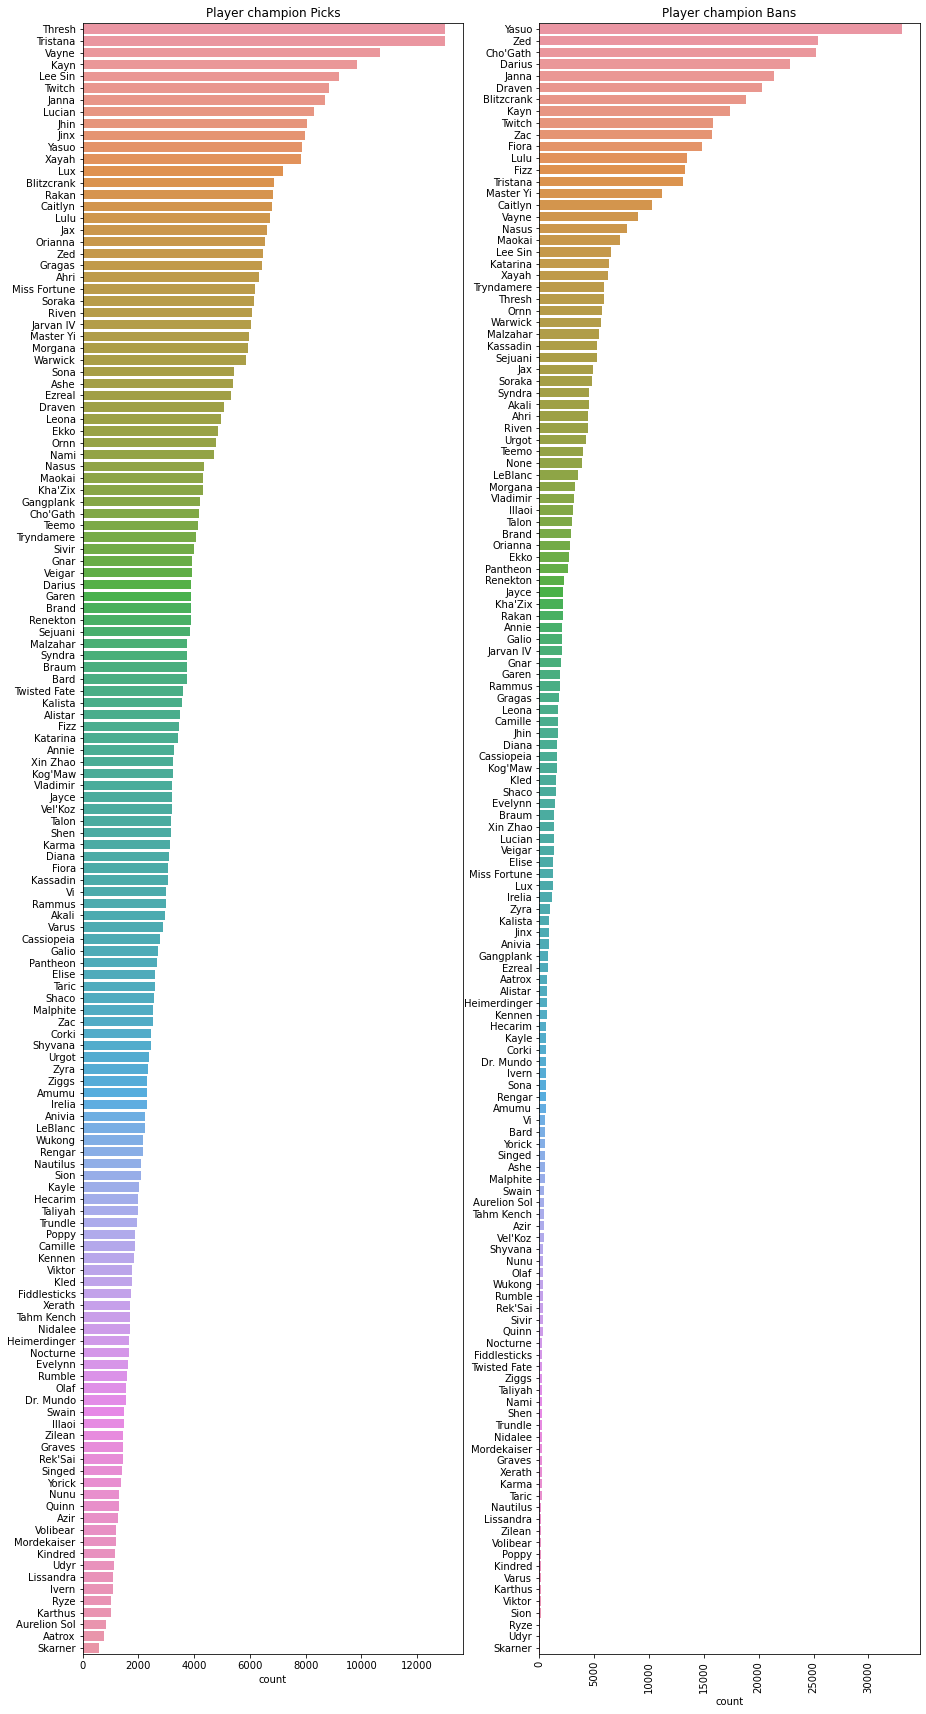

In [94]:
fig, (table1, table2) = plt.subplots(1, 2, sharey=False, figsize=(15,30))
plt.xticks(rotation=90)
sns.countplot(y=player_champ_pick, ax=table1, order=player_champ_pick.value_counts().index, data=ranked_games )
sns.countplot(y=player_champ_ban, ax=table2, order=player_champ_ban.value_counts().index, data=ranked_games )
table1.set_title('Player champion Picks')
table2.set_title('Player champion Bans')
plt.show()

Dažniausiai pasirenkami personažai yra Tresh, Tristana, Vayne.<br>
Dažniausiai užblokuojami personažai yra Yasou, Zed, Cho'ghat.<br>
Galima teigti jog dažniausia renkamasi ADC (Attack Damage Carry) personažai,blokuojami assasin ir top damage tipo personažai.<br>
Įdomu tai jog didžiausią tikimybė nužudyti ADC tipo personažą turi būtet dažniausiai užblokuojami personažai. 

## Kokius 'summoner spell' renkasi žaidėjai iš kiekvienos komandos:

In [68]:
ranked_games.columns

Index(['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner',
       'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron',
       'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1',
       't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2',
       't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id',
       't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1',
       't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills',
       't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3',
       't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2',
       't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id',
       't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1',
       't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2',
       't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills',
       't2_riftHer

In [80]:
ranked_games['t1_champ1_sum1'].dtypes

dtype('int64')

In [76]:
Summoner_spell_columns = ['t1_champ1_sum1', 't1_champ1_sum2', 't1_champ2_sum1', 't1_champ2_sum2', 
                          't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4_sum1', 't1_champ4_sum2',
                          't1_champ5_sum1', 't1_champ5_sum2',
                          't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2_sum1', 't2_champ2_sum2',
                          't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4_sum1', 't2_champ4_sum2',
                          't2_champ5_sum1','t2_champ5_sum2']
Summoner_spell_columns

['t1_champ1_sum1',
 't1_champ1_sum2',
 't1_champ2_sum1',
 't1_champ2_sum2',
 't1_champ3_sum1',
 't1_champ3_sum2',
 't1_champ4_sum1',
 't1_champ4_sum2',
 't1_champ5_sum1',
 't1_champ5_sum2',
 't2_champ1_sum1',
 't2_champ1_sum2',
 't2_champ2_sum1',
 't2_champ2_sum2',
 't2_champ3_sum1',
 't2_champ3_sum2',
 't2_champ4_sum1',
 't2_champ4_sum2',
 't2_champ5_sum1',
 't2_champ5_sum2']

In [109]:
How_many_spells_used = ranked_games[Summoner_spell_columns].apply(pd.value_counts)
How_many_spells_used ['count']= How_many_spells_used[Summoner_spell_columns].sum
How_many_spells_used

,t1_champ1_sum1,t1_champ1_sum2,t1_champ2_sum1,t1_champ2_sum2,t1_champ3_sum1,t1_champ3_sum2,t1_champ4_sum1,t1_champ4_sum2,t1_champ5_sum1,t1_champ5_sum2,...,t2_champ1_sum2,t2_champ2_sum1,t2_champ2_sum2,t2_champ3_sum1,t2_champ3_sum2,t2_champ4_sum1,t2_champ4_sum2,t2_champ5_sum1,t2_champ5_sum2,count
1,160,199,151,153,135,168,136,134,125,182,...,190,129,159,136,182,154,181,149,184,<bound method NDFrame._add_numeric_operations....
3,3640,4394,3904,4614,3928,4738,3992,4723,3763,4557,...,4459,3912,4596,3928,4704,3855,4717,3885,4511,<bound method NDFrame._add_numeric_operations....
4,28164,22216,27998,22490,28019,22397,27988,22393,27966,22377,...,22204,28037,22427,28170,22255,28089,22322,27838,22589,<bound method NDFrame._add_numeric_operations....
6,744,798,678,706,647,750,664,689,720,800,...,761,715,706,690,712,672,737,665,711,<bound method NDFrame._add_numeric_operations....
7,4581,5758,4922,6309,4902,6180,4971,6136,4500,5826,...,5934,4854,6197,4834,6173,4896,6276,4571,5746,<bound method NDFrame._add_numeric_operations....
11,4711,5635,4780,5520,4789,5511,4681,5579,4768,5550,...,5656,4690,5558,4621,5594,4894,5594,4777,5563,<bound method NDFrame._add_numeric_operations....
12,4968,6395,4576,5954,4664,6000,4651,6020,5083,6291,...,6358,4693,6085,4736,6067,4581,5926,5024,6350,<bound method NDFrame._add_numeric_operations....
14,3820,5205,3832,4930,3786,4894,3777,4982,3917,5093,...,5047,3823,4875,3758,4980,3715,4899,3956,5032,<bound method NDFrame._add_numeric_operations....
21,702,890,649,814,620,852,630,834,648,814,...,881,637,887,617,823,634,838,625,804,<bound method NDFrame._add_numeric_operations....


In [93]:
summ_spell = summoner_spell[['id', 'name']]
spell_dict= dict(zip(summ_spell['id'],summ_spell['name']))
for spell in summoner_spell:
    spell = ranked_games[summoner_spell].replace(summoner_spell, inplace=True)
spell_dict

{1: 'Cleanse',
 11: 'Smite',
 12: 'Teleport',
 13: 'Clarity',
 14: 'Ignite',
 21: 'Barrier',
 3: 'Exhaust',
 30: 'To the King!',
 31: 'Poro Toss',
 32: 'Mark',
 33: 'Nexus Siege: Siege Weapon Slot',
 34: 'Nexus Siege: Siege Weapon Slot',
 35: 'Disabled Summoner Spells',
 36: 'Disabled Summoner Spells',
 4: 'Flash',
 6: 'Ghost',
 7: 'Heal'}

Pirmas: Abiejų komandų dažniausias 'Spell' yra 'Flash'<br>
Antras: Turime 'Smite' arba 'Teleport'

#  ANTRA DALIS: "League of legends championship 2021"

**Duomenų sukėlimas** *("League of legends championship 2021")*

In [130]:
import mysql.connector
import pandas as pd
mydb = mysql.connector.connect(
    host="localhost",
    port="3317",
    user="root",
    password="MRspaikIS899",
)
cursor = mydb.cursor()
cursor.execute('USE lol_worlds_2021')
champions_2021 = pd.read_sql('SELECT * FROM champions', con=mydb)
champions_2021

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Middle,1,1.2%,1.2%,4.8%,100%,100%,2,2,...,46,467,-2.0,8.8,25.1%,377,22.1%,20.9%,0.21,0.38
1,Aatrox,Top,2,2.4%,1.2%,4.8%,50%,100%,6,2,...,14,184,-10.0,7.9,25.0%,260,17.5%,24.0%,0.36,0.22
2,Alistar,Support,5,6.0%,0.0%,6.0%,40%,80%,6,19,...,-44,-77,2.4,0.9,1.9%,121,7.1%,8.4%,1.96,0.34
3,Amumu,Support,1,1.2%,7.2%,8.4%,100%,0%,2,4,...,-39,446,2.0,0.8,1.8%,155,6.6%,8.8%,1.69,0.34
4,Annie,Middle,2,2.4%,1.2%,3.6%,50%,100%,6,6,...,-345,-457,-14.0,5.6,16.4%,396,20.1%,16.6%,0.60,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Yone,Middle,1,1.2%,0.0%,1.2%,0%,100%,2,3,...,58,47,1.0,8.3,24.8%,245,19.7%,25.5%,0.20,0.40
88,Yuumi,Support,15,18.1%,78.3%,96.4%,53%,0%,21,21,...,117,51,-8.4,0.2,1.0%,323,17.6%,9.6%,1.51,0.17
89,Ziggs,ADC,9,10.8%,7.2%,18.1%,33%,78%,21,21,...,-331,0,-6.8,9.1,31.3%,676,36.4%,24.6%,0.42,0.16
90,Zilean,Support,3,3.6%,0.0%,3.6%,67%,100%,1,4,...,10,-222,-2.0,1.1,2.3%,60,3.6%,9.2%,1.83,0.43


In [131]:
import mysql.connector
import pandas as pd
mydb = mysql.connector.connect(
    host="localhost",
    port="3317",
    user="root",
    password="MRspaikIS899",
)
cursor = mydb.cursor()
cursor.execute('USE lol_worlds_2021')
players_2021 = pd.read_sql('SELECT * FROM Players', con=mydb)
players_2021

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,WCPM
0,Abbedagge,100 Thieves,Middle,6,50%,50%,15,16,26,2.6,...,8.6,26.7%,349,22.2%,23.1%,242,23.2%,0,0.53,0.24
1,Adam,Fnatic,Top,6,17%,50%,26,39,30,1.4,...,7.6,26.4%,528,24.0%,23.2%,264,23.8%,0,0.32,0.22
2,Ale,LNG Esports,Top,7,43%,86%,24,20,29,2.7,...,8.7,28.6%,416,25.9%,24.9%,280,25.7%,0,0.33,0.22
3,Alphari,Team Liquid,Top,7,43%,57%,19,17,22,2.4,...,8.6,26.9%,394,24.6%,21.2%,266,24.8%,0,0.48,0.15
4,Aria,DetonatioN FocusMe,Middle,6,0%,50%,14,13,20,2.6,...,7.8,26.0%,395,28.7%,26.4%,226,24.8%,0,0.40,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Wei,Royal Never Give Up,Jungle,12,58%,42%,53,41,95,3.6,...,4.8,13.9%,377,19.7%,19.0%,214,18.5%,1,0.50,0.48
77,Willer,Hanwha Life Esports,Jungle,10,40%,10%,25,28,64,3.2,...,5.2,14.7%,221,12.3%,12.9%,181,16.6%,3,0.52,0.38
78,Xiaohu,Royal Never Give Up,Top,12,58%,58%,46,33,78,3.8,...,8.8,30.6%,505,25.7%,24.6%,294,25.7%,0,0.38,0.24
79,Yutapon,DetonatioN FocusMe,ADC,6,0%,67%,12,16,12,1.5,...,9.1,33.4%,329,21.6%,25.6%,249,27.1%,0,0.26,0.31


## Personažų pasirinkimai

In [181]:
champions_2021.sort_values('GP', ascending = False).head(10)

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
46,Miss Fortune,ADC,51,61.4%,12.0%,73.5%,43%,35%,179,110,...,-17,37,0.5,9.3,31.3%,429,24.7%,26.6%,0.45,0.40
36,Lee Sin,Jungle,37,44.6%,54.2%,98.8%,59%,0%,117,90,...,-42,14,-1.3,5.4,15.4%,256,14.1%,17.9%,0.61,0.36
21,Graves,Top,33,39.8%,34.9%,78.3%,64%,9%,102,76,...,33,39,2.6,9.5,30.6%,487,26.9%,26.0%,0.35,0.28
37,Leona,Support,32,38.6%,26.5%,65.1%,34%,34%,22,103,...,-34,-8,1.1,1.1,2.9%,94,5.9%,8.3%,1.66,0.44
5,Aphelios,ADC,31,37.3%,41.0%,78.3%,61%,48%,115,63,...,128,-47,4.2,9.3,31.2%,444,25.7%,26.4%,0.48,0.32
84,Xin Zhao,Jungle,30,36.1%,30.1%,66.3%,33%,63%,57,106,...,-125,-145,-2.2,5.0,13.5%,276,16.3%,16.6%,0.38,0.45
56,Rakan,Support,29,34.9%,19.3%,54.2%,62%,28%,24,75,...,-52,-81,0.3,1.1,3.1%,130,7.1%,9.1%,2.15,0.51
29,Jhin,ADC,28,33.7%,2.4%,36.1%,64%,68%,93,31,...,-126,-72,-4.8,8.9,28.7%,384,21.3%,24.4%,0.45,0.25
25,Jarvan IV,Jungle,28,33.7%,39.8%,77.1%,50%,54%,58,87,...,16,-74,-0.8,4.9,12.4%,235,13.6%,16.3%,0.42,0.51
61,Ryze,Middle,24,28.9%,38.6%,67.5%,46%,29%,71,62,...,17,40,1.2,8.9,27.0%,349,21.4%,24.4%,0.45,0.18


World champion metu žaidėjai daugiausia rinkosi ADC/ Jungle rolės personažus.

## Rolės ir personažo pasirinkimas

In [142]:
Champ_role = champions_2021.groupby('Pos')[['Champion']].count().sort_values(by = 'Champion', ascending = False)
print(Champ_role)

         Champion
Pos              
Top            24
Middle         21
Support        17
Jungle         16
ADC            14


In [144]:
c = champions_2021.groupby('Pos')
c

In [145]:
for x in c:
    print(x)

('ADC',         Champion  Pos  GP     P%     B%   P+B%   W%  CTR%    K    D  ...  \
5       Aphelios  ADC  31  37.3%  41.0%  78.3%  61%   48%  115   63  ...   
6           Ashe  ADC   1   1.2%   0.0%   1.2%   0%    0%    2    6  ...   
10        Draven  ADC   4   4.8%  21.7%  26.5%  25%   50%   11    8  ...   
11        Ezreal  ADC  11  13.3%   9.6%  22.9%  55%   82%   42   23  ...   
29          Jhin  ADC  28  33.7%   2.4%  36.1%  64%   68%   93   31  ...   
30          Jinx  ADC   1   1.2%   3.6%   4.8%   0%  100%    0    3  ...   
31        Kai'Sa  ADC   8   9.6%   2.4%  12.0%  38%   63%   32   18  ...   
32       Kalista  ADC   1   1.2%   1.2%   2.4%   0%  100%    6    4  ...   
40        Lucian  ADC  15  18.1%  54.2%  78.3%  60%    7%   58   41  ...   
46  Miss Fortune  ADC  51  61.4%  12.0%  73.5%  43%   35%  179  110  ...   
74      Tristana  ADC   3   3.6%   1.2%   4.8%  67%   67%    9    5  ...   
79         Varus  ADC   2   2.4%   1.2%   3.6%   0%  100%    1    6  ...   
83  

In [152]:
c.get_group('Top')

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
1,Aatrox,Top,2,2.4%,1.2%,4.8%,50%,100%,6,2,...,14,184,-10.0,7.9,25.0%,260,17.5%,24.0%,0.36,0.22
9,Camille,Top,7,8.4%,10.8%,19.3%,57%,43%,16,30,...,-346,-397,-19.3,7.6,24.7%,340,19.7%,21.2%,0.40,0.23
13,Fiora,Top,2,2.4%,0.0%,2.4%,100%,100%,10,2,...,564,847,16.5,10.1,32.5%,389,21.3%,25.6%,0.31,0.22
15,Gangplank,Top,2,2.4%,3.6%,6.0%,100%,50%,10,7,...,660,701,19.5,8.2,29.3%,714,31.6%,27.9%,0.39,0.21
16,Gnar,Top,8,9.6%,2.4%,12.0%,38%,75%,17,20,...,-139,-24,3.0,7.9,24.1%,398,24.9%,23.0%,0.48,0.25
19,Gragas,Top,4,4.8%,1.2%,8.4%,50%,75%,13,13,...,-267,-213,-8.8,7.6,26.2%,486,27.4%,21.7%,0.35,0.20
21,Graves,Top,33,39.8%,34.9%,78.3%,64%,9%,102,76,...,33,39,2.6,9.5,30.6%,487,26.9%,26.0%,0.35,0.28
22,Gwen,Top,14,16.9%,10.8%,27.7%,29%,50%,36,34,...,-28,-3,1.7,8.7,27.6%,415,26.1%,24.9%,0.33,0.32
24,Irelia,Top,5,6.0%,54.2%,65.1%,20%,80%,7,25,...,-472,-364,-4.2,8.4,29.2%,264,18.3%,24.6%,0.38,0.17
26,Jarvan IV,Top,3,3.6%,39.8%,77.1%,0%,100%,10,9,...,262,272,0.0,7.5,22.4%,299,18.7%,22.2%,0.44,0.26


In [153]:
c.get_group('ADC')

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
5,Aphelios,ADC,31,37.3%,41.0%,78.3%,61%,48%,115,63,...,128,-47,4.2,9.3,31.2%,444,25.7%,26.4%,0.48,0.32
6,Ashe,ADC,1,1.2%,0.0%,1.2%,0%,0%,2,6,...,1138,555,15.0,7.3,27.3%,409,23.5%,20.9%,0.36,0.32
10,Draven,ADC,4,4.8%,21.7%,26.5%,25%,50%,11,8,...,166,50,4.0,9.2,30.9%,317,20.5%,27.9%,0.64,0.33
11,Ezreal,ADC,11,13.3%,9.6%,22.9%,55%,82%,42,23,...,-62,-158,-6.5,8.9,29.0%,569,30.8%,25.2%,0.42,0.21
29,Jhin,ADC,28,33.7%,2.4%,36.1%,64%,68%,93,31,...,-126,-72,-4.8,8.9,28.7%,384,21.3%,24.4%,0.45,0.25
30,Jinx,ADC,1,1.2%,3.6%,4.8%,0%,100%,0,3,...,2,-480,-7.0,10.1,35.0%,376,24.0%,26.1%,0.49,0.46
31,Kai'Sa,ADC,8,9.6%,2.4%,12.0%,38%,63%,32,18,...,-4,52,4.0,9.2,31.8%,432,24.1%,27.0%,0.57,0.32
32,Kalista,ADC,1,1.2%,1.2%,2.4%,0%,100%,6,4,...,109,-285,3.0,8.4,28.6%,509,23.4%,28.6%,0.96,0.38
40,Lucian,ADC,15,18.1%,54.2%,78.3%,60%,7%,58,41,...,196,206,4.6,9.6,31.9%,507,27.6%,26.3%,0.47,0.48
46,Miss Fortune,ADC,51,61.4%,12.0%,73.5%,43%,35%,179,110,...,-17,37,0.5,9.3,31.3%,429,24.7%,26.6%,0.45,0.40


In [154]:
c.get_group('Middle')

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
0,Aatrox,Middle,1,1.2%,1.2%,4.8%,100%,100%,2,2,...,46,467,-2.0,8.8,25.1%,377,22.1%,20.9%,0.21,0.38
4,Annie,Middle,2,2.4%,1.2%,3.6%,50%,100%,6,6,...,-345,-457,-14.0,5.6,16.4%,396,20.1%,16.6%,0.60,0.11
7,Azir,Middle,10,12.0%,14.5%,26.5%,40%,60%,34,34,...,37,188,9.0,8.4,25.1%,523,30.0%,22.9%,0.48,0.21
14,Galio,Middle,3,3.6%,9.6%,13.3%,33%,67%,8,10,...,-767,-783,-28.7,6.1,18.3%,316,20.0%,19.6%,0.54,0.14
23,Irelia,Middle,4,4.8%,54.2%,65.1%,25%,50%,12,17,...,-418,-55,4.0,9.2,26.8%,294,18.3%,26.7%,0.41,0.17
33,Kassadin,Middle,1,1.2%,1.2%,2.4%,100%,100%,8,2,...,-209,-226,0.0,8.2,24.2%,842,43.6%,25.2%,0.41,0.49
35,LeBlanc,Middle,23,27.7%,61.4%,89.2%,57%,30%,95,44,...,57,231,6.4,8.3,24.2%,573,30.2%,24.1%,0.57,0.37
39,Lissandra,Middle,5,6.0%,3.6%,9.6%,80%,100%,8,8,...,-154,-231,-5.2,8.5,23.7%,388,21.6%,21.2%,0.23,0.36
44,Malzahar,Middle,3,3.6%,2.4%,6.0%,67%,100%,10,6,...,-391,-157,-7.7,8.6,27.1%,405,21.1%,24.5%,0.30,0.32
51,Orianna,Middle,12,14.5%,3.6%,18.1%,33%,67%,23,25,...,-175,-109,-3.7,8.8,26.4%,385,25.8%,23.7%,0.44,0.21


In [155]:
c.get_group('Jungle')

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
12,Fiddlesticks,Jungle,2,2.4%,2.4%,4.8%,50%,100%,8,9,...,-94,-476,-5.5,5.0,13.0%,341,16.9%,16.7%,0.10,0.16
17,Gragas,Jungle,1,1.2%,1.2%,8.4%,0%,100%,2,7,...,-653,-73,-7.0,4.2,13.6%,144,7.1%,13.9%,0.71,0.33
20,Graves,Jungle,3,3.6%,34.9%,78.3%,0%,100%,4,12,...,-36,111,10.0,7.2,22.1%,314,19.5%,20.8%,0.33,0.57
25,Jarvan IV,Jungle,28,33.7%,39.8%,77.1%,50%,54%,58,87,...,16,-74,-0.8,4.9,12.4%,235,13.6%,16.3%,0.42,0.51
36,Lee Sin,Jungle,37,44.6%,54.2%,98.8%,59%,0%,117,90,...,-42,14,-1.3,5.4,15.4%,256,14.1%,17.9%,0.61,0.36
38,Lillia,Jungle,2,2.4%,0.0%,2.4%,50%,100%,7,8,...,77,84,7.0,6.7,13.3%,432,28.8%,23.5%,0.46,0.43
49,Olaf,Jungle,6,7.2%,14.5%,24.1%,50%,83%,18,16,...,257,339,4.5,5.2,14.6%,365,16.8%,17.1%,0.37,0.45
52,Poppy,Jungle,8,9.6%,6.0%,18.1%,63%,88%,14,15,...,19,45,2.5,5.7,16.4%,245,14.4%,17.0%,0.32,0.45
55,Qiyana,Jungle,10,12.0%,10.8%,22.9%,70%,70%,43,25,...,63,-72,-0.2,6.2,18.7%,363,19.1%,18.8%,0.67,0.52
62,Sejuani,Jungle,1,1.2%,0.0%,1.2%,0%,0%,4,3,...,-328,410,15.0,4.4,10.7%,326,15.4%,15.9%,0.44,0.42


In [156]:
c.get_group('Support')

,Champion,Pos,GP,P%,B%,P+B%,W%,CTR%,K,D,...,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,GOLD%,WPM,WCPM
2,Alistar,Support,5,6.0%,0.0%,6.0%,40%,80%,6,19,...,-44,-77,2.4,0.9,1.9%,121,7.1%,8.4%,1.96,0.34
3,Amumu,Support,1,1.2%,7.2%,8.4%,100%,0%,2,4,...,-39,446,2.0,0.8,1.8%,155,6.6%,8.8%,1.69,0.34
8,Braum,Support,11,13.3%,9.6%,22.9%,36%,100%,4,38,...,-47,-75,2.5,1.1,2.3%,156,9.9%,8.5%,1.67,0.30
18,Gragas,Support,1,1.2%,1.2%,8.4%,0%,100%,1,5,...,28,433,1.0,0.8,1.6%,168,9.5%,6.9%,1.64,0.21
37,Leona,Support,32,38.6%,26.5%,65.1%,34%,34%,22,103,...,-34,-8,1.1,1.1,2.9%,94,5.9%,8.3%,1.66,0.44
42,Lulu,Support,16,19.3%,3.6%,22.9%,56%,75%,12,34,...,156,80,-3.2,0.5,1.8%,105,6.7%,9.2%,1.57,0.37
45,Maokai,Support,2,2.4%,0.0%,2.4%,50%,50%,2,7,...,48,291,3.0,1.5,5.1%,393,19.6%,9.7%,1.61,0.46
47,Nami,Support,13,15.7%,24.1%,39.8%,54%,38%,11,29,...,91,70,-2.9,0.5,1.9%,184,10.5%,9.0%,2.07,0.39
48,Nautilus,Support,10,12.0%,4.8%,16.9%,50%,90%,4,47,...,-194,-63,8.0,1.0,1.9%,118,6.4%,7.9%,1.59,0.30
54,Pyke,Support,3,3.6%,0.0%,3.6%,33%,67%,13,15,...,317,331,4.7,1.3,4.4%,205,10.3%,14.1%,2.34,0.51


Pagal pasirinkima rolėje galima teigti: <br>
Jungle ir Supp rolėse žaidėjai renkasi pilnai tai rolej sukurtus personažus.<br>
Adc, mid ir top rolėse žaidėjai linkę ekspermentuoti, daryti nestandartinius sprendimus imtis kitokių taktikų. <br>
pvz.: Adc rolėje pasiimtas mid (pilnos magijos) personažas(Ziggs), Top rolėje pasiimtas adc (marksmen) personažas(Lucian)


## KDA top 10 žaidėjų

In [158]:
players_2021.nlargest(10, ['K'])

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,WCPM
65,ShowMaker,DWG KIA,Middle,19,74%,53%,75,27,125,7.4,...,8.2,23.9%,506,27.1%,28.5%,276,23.6%,0,0.51,0.36
73,Viper,EDward Gaming,ADC,21,62%,52%,73,41,104,4.3,...,9.2,29.7%,477,25.6%,25.9%,287,25.0%,1,0.56,0.38
31,Ghost,DWG KIA,ADC,19,74%,68%,72,30,102,5.8,...,8.7,28.9%,463,24.1%,24.9%,292,24.8%,0,0.53,0.25
64,Scout,EDward Gaming,Middle,21,62%,43%,69,38,109,4.7,...,8.5,25.1%,415,22.7%,23.1%,269,23.4%,0,0.35,0.26
46,Khan,DWG KIA,Top,19,74%,58%,67,55,113,3.3,...,8.6,28.3%,508,26.3%,24.4%,287,24.4%,0,0.44,0.32
27,Flandre,EDward Gaming,Top,21,62%,29%,56,53,91,2.8,...,9.3,29.9%,531,28.7%,28.4%,295,25.9%,0,0.26,0.31
62,Ruler,Gen.G,ADC,16,63%,69%,56,25,91,5.9,...,9.4,31.4%,440,25.2%,27.0%,313,27.1%,0,0.55,0.40
13,Canyon,DWG KIA,Jungle,19,74%,42%,55,34,130,5.4,...,5.2,15.1%,253,13.2%,13.7%,201,17.1%,1,0.63,0.33
76,Wei,Royal Never Give Up,Jungle,12,58%,42%,53,41,95,3.6,...,4.8,13.9%,377,19.7%,19.0%,214,18.5%,1,0.50,0.48
6,Bdd,Gen.G,Middle,16,63%,75%,52,40,100,3.8,...,8.0,23.0%,539,30.4%,28.6%,259,22.6%,0,0.44,0.21


In [159]:
players_2021.nlargest(10, ['A'])

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,WCPM
52,Meiko,EDward Gaming,Support,21,62%,48%,14,41,188,4.9,...,0.8,2.1%,156,8.4%,7.5%,105,9.0%,0,1.69,0.39
8,BeryL,DWG KIA,Support,19,74%,63%,22,44,166,4.3,...,1.3,3.8%,173,9.2%,8.5%,119,10.0%,0,1.93,0.57
42,Jiejie,EDward Gaming,Jungle,21,62%,52%,47,52,155,3.9,...,5.2,13.3%,269,14.6%,15.1%,193,16.7%,4,0.43,0.48
48,Life,Gen.G,Support,16,63%,25%,19,39,149,4.3,...,0.7,2.0%,127,7.0%,5.9%,104,8.9%,0,1.66,0.34
13,Canyon,DWG KIA,Jungle,19,74%,42%,55,34,130,5.4,...,5.2,15.1%,253,13.2%,13.7%,201,17.1%,1,0.63,0.33
65,ShowMaker,DWG KIA,Middle,19,74%,53%,75,27,125,7.4,...,8.2,23.9%,506,27.1%,28.5%,276,23.6%,0,0.51,0.36
45,Keria,T1,Support,14,71%,64%,8,17,120,7.5,...,0.9,1.7%,136,7.4%,5.9%,116,9.8%,0,1.82,0.30
20,Cryin,Royal Never Give Up,Middle,12,58%,33%,31,28,114,5.2,...,6.9,20.9%,425,23.5%,24.2%,237,20.6%,0,0.42,0.15
46,Khan,DWG KIA,Top,19,74%,58%,67,55,113,3.3,...,8.6,28.3%,508,26.3%,24.4%,287,24.4%,0,0.44,0.32
43,Kaiser,MAD Lions,Support,11,36%,36%,10,34,112,3.6,...,0.9,2.5%,153,8.0%,7.1%,99,8.6%,0,2.05,0.42


In [162]:
players_2021.nsmallest(10, ['D'])

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,WCPM
49,Light,LNG Esports,ADC,7,43%,43%,20,7,35,7.9,...,9.7,31.8%,506,30.9%,35.8%,291,26.0%,0,0.38,0.37
69,Tarzan,LNG Esports,Jungle,7,43%,14%,12,11,44,5.1,...,5.3,13.6%,236,13.7%,12.9%,178,16.5%,0,0.39,0.39
72,Unified,PSG Talon,ADC,6,50%,33%,14,12,34,4.0,...,8.3,28.0%,384,20.3%,20.5%,257,23.1%,0,0.48,0.28
4,Aria,DetonatioN FocusMe,Middle,6,0%,50%,14,13,20,2.6,...,7.8,26.0%,395,28.7%,26.4%,226,24.8%,0,0.40,0.21
44,Kaiwing,PSG Talon,Support,6,50%,50%,3,13,62,5.0,...,0.7,1.4%,219,11.1%,10.5%,89,8.0%,0,1.76,0.26
66,Ssumday,100 Thieves,Top,6,50%,50%,11,13,29,3.1,...,7.8,24.7%,412,25.6%,24.3%,228,21.9%,0,0.49,0.16
26,FBI,100 Thieves,ADC,6,50%,17%,23,14,28,3.6,...,9.3,30.6%,430,29.6%,31.6%,293,27.6%,0,0.49,0.28
32,Gumayusi,T1,ADC,14,71%,36%,49,14,52,7.2,...,10.2,34.2%,459,26.5%,28.8%,324,27.5%,0,0.47,0.33
35,huhi,100 Thieves,Support,6,50%,33%,10,14,49,4.2,...,0.7,2.1%,178,11.0%,9.9%,108,10.0%,0,2.02,0.41
40,Iwandy,LNG Esports,Support,7,43%,57%,5,14,49,3.9,...,1.0,2.7%,102,6.6%,5.9%,94,8.4%,0,1.71,0.40


In [160]:
players_2021.nlargest(10, ['D'])

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,WCPM
46,Khan,DWG KIA,Top,19,74%,58%,67,55,113,3.3,...,8.6,28.3%,508,26.3%,24.4%,287,24.4%,0,0.44,0.32
27,Flandre,EDward Gaming,Top,21,62%,29%,56,53,91,2.8,...,9.3,29.9%,531,28.7%,28.4%,295,25.9%,0,0.26,0.31
42,Jiejie,EDward Gaming,Jungle,21,62%,52%,47,52,155,3.9,...,5.2,13.3%,269,14.6%,15.1%,193,16.7%,4,0.43,0.48
16,Clid,Gen.G,Jungle,16,63%,50%,52,49,103,3.2,...,5.1,14.8%,285,16.3%,17.0%,196,17.1%,5,0.60,0.49
37,Hylissang,Fnatic,Support,6,17%,33%,3,47,65,1.4,...,0.9,2.3%,188,9.1%,8.6%,96,8.9%,0,1.69,0.36
5,Armut,MAD Lions,Top,11,36%,64%,35,46,61,2.1,...,7.8,24.4%,430,24.2%,23.3%,257,22.7%,0,0.44,0.25
53,Ming,Royal Never Give Up,Support,12,58%,75%,14,45,105,2.6,...,1.0,2.3%,132,6.9%,6.7%,102,8.8%,0,1.71,0.34
8,BeryL,DWG KIA,Support,19,74%,63%,22,44,166,4.3,...,1.3,3.8%,173,9.2%,8.5%,119,10.0%,0,1.93,0.57
23,Elyoya,MAD Lions,Jungle,11,36%,73%,33,44,85,2.7,...,5.3,15.3%,258,13.5%,13.6%,200,17.3%,0,0.39,0.45
36,Humanoid,MAD Lions,Middle,11,36%,55%,46,42,66,2.7,...,8.9,27.7%,534,28.5%,29.5%,289,25.8%,0,0.44,0.24


In [164]:
best_kda = players_2021.groupby(['KDA']).max().sort_values(by = 'KDA', ascending = False)
best_kda.head(10)

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KP,...,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,WCPM
KDA,,,,,,,,,,,,,,,,,,,,,
7.9,Light,LNG Esports,ADC,7,43%,43%,20,7,35,62.5%,...,9.7,31.8%,506,30.9%,35.8%,291,26.0%,0,0.38,0.37
7.5,Keria,T1,Support,14,71%,64%,8,17,120,78.0%,...,0.9,1.7%,136,7.4%,5.9%,116,9.8%,0,1.82,0.30
7.4,ShowMaker,DWG KIA,Middle,19,74%,53%,75,27,125,68.7%,...,8.2,23.9%,506,27.1%,28.5%,276,23.6%,0,0.51,0.36
7.2,Gumayusi,T1,ADC,14,71%,36%,49,14,52,61.6%,...,10.2,34.2%,459,26.5%,28.8%,324,27.5%,0,0.47,0.33
5.9,Ruler,Gen.G,ADC,16,63%,69%,56,25,91,65.0%,...,9.4,31.4%,440,25.2%,27.0%,313,27.1%,0,0.55,0.40
5.8,Ghost,DWG KIA,ADC,19,74%,68%,72,30,102,59.8%,...,8.7,28.9%,463,24.1%,24.9%,292,24.8%,0,0.53,0.25
5.4,Canyon,DWG KIA,Jungle,19,74%,42%,55,34,130,63.6%,...,5.2,15.1%,253,13.2%,13.7%,201,17.1%,1,0.63,0.33
5.2,GALA,Royal Never Give Up,Middle,12,58%,42%,51,28,114,74.4%,...,9.3,32.3%,468,24.1%,25.6%,304,26.4%,0,0.42,0.33
5.1,Tarzan,LNG Esports,Jungle,7,43%,14%,12,11,44,63.6%,...,5.3,13.6%,236,13.7%,12.9%,178,16.5%,0,0.39,0.39


Žaidime ypač žemesnėse lygose vyrauja tai jog 'kill'as' yra gaunamas, bet kokia kaina, net gi ir pačio personažo mirties, todėl mirčių ir nužudymų skaičius būna labai panašus. <br>
Pažvelgus į mūsų duomenis galime teigti jog dviejų top komandų DWG KIA (2 vieta) ir EDward Gaming (laimėtojai), 2 komandos žaidėjai Khan ir Flandre buvo tarp TOP 10 daugiausia mirusiu ir daugiausia nuzudziusiu zaideju. <br>
Puikiausias pasirodymas DWG KIA žaidėjo Canyon pasirodymas, kuris pateko tarp TOP 10 daugiausia nužudžiusių ir padėjusių komandai žaidėjų. <br>

## XP ir GOLD difference 

In [167]:
players_2021['Avg_gold_dif_per_game'] = players_2021['GD10'] / players_2021['GP']
players_2021

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,WCPM,Avg_gold_dif_per_game
0,Abbedagge,100 Thieves,Middle,6,50%,50%,15,16,26,2.6,...,26.7%,349,22.2%,23.1%,242,23.2%,0,0.53,0.24,-74.166667
1,Adam,Fnatic,Top,6,17%,50%,26,39,30,1.4,...,26.4%,528,24.0%,23.2%,264,23.8%,0,0.32,0.22,-51.833333
2,Ale,LNG Esports,Top,7,43%,86%,24,20,29,2.7,...,28.6%,416,25.9%,24.9%,280,25.7%,0,0.33,0.22,-3.571429
3,Alphari,Team Liquid,Top,7,43%,57%,19,17,22,2.4,...,26.9%,394,24.6%,21.2%,266,24.8%,0,0.48,0.15,76.285714
4,Aria,DetonatioN FocusMe,Middle,6,0%,50%,14,13,20,2.6,...,26.0%,395,28.7%,26.4%,226,24.8%,0,0.40,0.21,35.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Wei,Royal Never Give Up,Jungle,12,58%,42%,53,41,95,3.6,...,13.9%,377,19.7%,19.0%,214,18.5%,1,0.50,0.48,-11.750000
77,Willer,Hanwha Life Esports,Jungle,10,40%,10%,25,28,64,3.2,...,14.7%,221,12.3%,12.9%,181,16.6%,3,0.52,0.38,-1.200000
78,Xiaohu,Royal Never Give Up,Top,12,58%,58%,46,33,78,3.8,...,30.6%,505,25.7%,24.6%,294,25.7%,0,0.38,0.24,15.000000
79,Yutapon,DetonatioN FocusMe,ADC,6,0%,67%,12,16,12,1.5,...,33.4%,329,21.6%,25.6%,249,27.1%,0,0.26,0.31,-126.833333


In [171]:
avg_gold_player = players_2021.groupby(['Avg_gold_dif_per_game']).max().sort_values(by = 'Avg_gold_dif_per_game', ascending = False)
avg_gold_player. head(10)

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,WCPM
Avg_gold_dif_per_game,,,,,,,,,,,,,,,,,,,,,
114.333333,FBI,100 Thieves,ADC,6,50%,17%,23,14,28,3.6,...,9.3,30.6%,430,29.6%,31.6%,293,27.6%,0,0.49,0.28
78.833333,huhi,100 Thieves,Support,6,50%,33%,10,14,49,4.2,...,0.7,2.1%,178,11.0%,9.9%,108,10.0%,0,2.02,0.41
76.285714,Alphari,Team Liquid,Top,7,43%,57%,19,17,22,2.4,...,8.6,26.9%,394,24.6%,21.2%,266,24.8%,0,0.48,0.15
46.600000,Chovy,Hanwha Life Esports,Middle,10,40%,50%,35,23,54,3.9,...,9.0,28.4%,570,31.0%,30.3%,288,26.5%,0,0.49,0.45
35.333333,Aria,DetonatioN FocusMe,Middle,6,0%,50%,14,13,20,2.6,...,7.8,26.0%,395,28.7%,26.4%,226,24.8%,0,0.40,0.21
33.300000,Deft,Hanwha Life Esports,ADC,10,40%,80%,40,23,47,3.8,...,8.8,29.4%,562,30.4%,32.8%,279,25.8%,0,0.55,0.28
29.833333,BEAN,Fnatic,ADC,6,17%,33%,24,22,32,2.5,...,8.0,26.7%,484,22.5%,21.8%,264,23.4%,0,0.37,0.29
22.000000,Bwipo,Fnatic,Jungle,6,17%,67%,22,30,52,2.5,...,6.2,18.7%,442,20.6%,21.0%,224,20.5%,0,0.39,0.43
19.857143,Oner,T1,Jungle,14,71%,57%,44,24,72,4.8,...,5.6,15.6%,315,16.9%,18.1%,210,17.8%,3,0.39,0.55


In [173]:
best_XP_diff = players_2021.groupby(['XPD10']).max().sort_values(by = 'XPD10', ascending = False)
best_XP_diff.head(10)

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,...,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,WCPM,Avg_gold_dif_per_game
XPD10,,,,,,,,,,,,,,,,,,,,,
408,Chovy,Hanwha Life Esports,Middle,10,40%,50%,35,23,54,3.9,...,28.4%,570,31.0%,30.3%,288,26.5%,0,0.49,0.45,46.600000
331,Bwipo,Fnatic,Jungle,6,17%,67%,22,30,52,2.5,...,18.7%,442,20.6%,21.0%,224,20.5%,0,0.39,0.43,22.000000
294,Larssen,Rogue,Middle,8,38%,50%,25,19,37,3.3,...,25.1%,323,19.3%,17.9%,269,24.4%,0,0.35,0.14,7.500000
283,huhi,100 Thieves,Support,6,50%,33%,10,14,49,4.2,...,2.1%,178,11.0%,9.9%,108,10.0%,0,2.02,0.41,78.833333
277,FBI,100 Thieves,ADC,6,50%,17%,23,14,28,3.6,...,30.6%,430,29.6%,31.6%,293,27.6%,0,0.49,0.28,114.333333
268,Tactical,Team Liquid,ADC,7,43%,86%,14,17,24,2.2,...,31.3%,453,25.9%,29.8%,269,24.9%,0,0.50,0.18,-21.000000
243,Humanoid,MAD Lions,Middle,11,36%,55%,46,42,66,2.7,...,27.7%,534,28.5%,29.5%,289,25.8%,0,0.44,0.24,7.090909
226,Jiejie,EDward Gaming,Jungle,21,62%,52%,47,52,155,3.9,...,13.3%,269,14.6%,15.1%,193,16.7%,4,0.43,0.48,7.238095
216,BEAN,Fnatic,ADC,6,17%,33%,24,22,32,2.5,...,26.7%,484,22.5%,21.8%,264,23.4%,0,0.37,0.29,29.833333


Galime matyti jog nei vienas žaidėjas iš pirmą (EDward gaming) ir antrą (DWG KIA) užėmusių komandų neturėjo max gold, todėl galime teigti jog ne visada nusipirktu items kiekis prieš kitą žaidėją mums gali padėti. <br>
Nors ir vieni iš paskutinių, bet lyginant XP difference jau galime pamatyti Jiejie ir BeryL top 10, noriu pabrėžti, kad XP difference ypač svarbus early game. 

# Išvados

Pasirinkau būtent Diamond lygą, nes nuo šios lygos gaming talentų ieško komandos, iš tiesų skaitant internete ar bendraujant su žaidėjais išsikeliama daug hipotezių, kad žaidimas nuo Diamond lygos nelabai skiriasi nuo Pro lygos žaidėjų, ką pastebėjau šios analizės metu, kad skirtumas yra didelis: <br>
1. Diamond lygje žaidžiama pagal nusistovėjusius champion pasirinkimus ir ban'us<br>
2. Pro lygoje pagal champ pasirinkimus galima teigti jog žaidimas yra labiau strateginis, kai diamond lygoje jis labiau inpulsyvus <br>
2. Pro lygoje mažesnę įtaką žaidimui daro uždirbtas gold, kai diamond lygoje gautas gold už tam tikrus dalykus net padeda laimėti <br>
3. Diamond lygoje maža koncentracija į džiunglių pabaisas kurios gali duoti secialių boost'ų komandai, kai pro lygoje tai visiškai priešinga <br>
